<h1 style="text-align: center;">Climate Change and Its Consequences</h1>

## Introduction

Climate change, in the broadest sense, refers to long term changes in weather and temperature patterns. Throughout almost all of Earth’s history, changes in Earth’s climate are attributed to a variety of natural factors. Some of these factors include changes in solar irradiance caused by the Earth’s orbit, the Sun’s 11 year solar cycle, and volcanic eruptions. These factors contribute to a natural cycle of global warming and cooling which occur in different intensities spanning multiple millenia.

Since the 1800s, however, the Earth has experienced a global warming event which is occurring at an unprecedented rate, far exceeding warming events earlier in the Earth’s history. Between 1901 and 2020, global temperatures rose by 1.98°F (1.1°C), with the 2010s being the warmest decade on record. Nearly universal consensus among scientists points to CO2 emissions caused by the burning of fossil fuels by humans as the primary cause of global warming.

Global increases in temperature will affect the Earth in a myriad of ways. Global sea levels will increase due to the melting of glaciers, Greenland and Antarctica ice sheets, and Arctic sea ice. Heat waves and droughts will occur more frequently and more severely, leading to increasingly intense wildfires and desertification. Consequently, these droughts will increase the amount of water vapor in the atmosphere, leading some areas to experience more intense precipitation and flooding.

It is incredibly important to study and address the effects of global warming, as human suffering will be increasingly widespread. Increasingly severe weather events will not only damage critical infrastructure, but will result in injuries, death, and the spread of disease. Higher temperatures will not only put crops and bodies of freshwater at risk, but will also prevent humans from working outdoors as the wet-bulb temperature will stop our bodies from adequately cooling. Lastly, climate change will hit poor countries more severely since many poor communities rely more on subsistence agriculture, which will result in mass displacement and famine.

This tutorial will cover the data science lifecycle, which will allow us to analyze the data and science regarding climate change and its consequences. There will be five major sections:

1. [Data Collection](#data-collection)
2. [Data Processing](#data-processing)
3. [Exploratory Analysis and Data Visualization](#exploratory-analysis-and-data-visualization)
4. [Model: Analysis, Hypothesis Testing, and Machine Learning](#model-analysis-hypothesis-testing-and-machine-learning)
5. [Interpretation: Insight and Policy Decision](#interpretation-insight-and-policy-decision)


## Data Collection

For this section, we'll be looking for datasets that will benefit our analysis on climate change. All of our datasets will be provided by [NASA's climate website](https://climate.nasa.gov/). Make sure to register an [Earthdata account](https://urs.earthdata.nasa.gov/home) account as it will be needed to download the required datasets. To get our data, we will be downloading each file using HTTP/HTTPS access and saving them as txt files.

To get started with the python code, we'll install several libraries as so:

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

Here is what each package does:
<ul>
  <li>Numpy - a library that deals with arrays.</li>
  <li>Pandas - a library used to analyze datasets.</li>
  <li>matplotlib - a library used for graphing data. Most utilities in this library lie under the pyplot submodule.</li>
  <li>sklearn - a library used for machine learning which allows us to apply regression to our data.</li>
  <li>statsmodels - a library that provides statistical computations for our data.</li>
</ul>

To get started, we'll be obtaining CO2 data.

Much discussion of climate change revolves around CO2 emissions. When sunlight reaches Earth, most of it is either absorbed by the Earth's surface or by the atmosphere after being reflected as infrared waves by the surface. The way the atmosphere absorbs some of the heat is through its greenhouse gases, with the most significant gas being CO2. While some molecules like nitrogen and oxygen don't interfere with the sun's infrared waves, greenhouse gases like CO2 will absorb these waves, then re-emit them in all directions, thereby heating up the Earth. Historically, CO2 never reached beyond 300 parts per million in the Earth's atmosphere, but since the 1950s, CO2 levels have reached beyond 300 ppm and now sit at 421 ppm.

We'll be obtaining the CO2 data from the NASA website mentioned before via HTTPS, then saving the file as "monthly_co2_emissions.txt".

We will also be obtaining the data from the "Ocean Warming", "Global Temperature", and "Sea Level" sections. Get the data via HTTP, then save the files as "ocean_heat.txt", "global_temperatures", and "global_sea_level.txt" respectively.

## Data Processing

In [106]:
# Processing the monthly CO2 data
with open('monthly_co2_emissions.txt') as f:
    monthly_co2_data = f.readlines()
del monthly_co2_data[0:58]

monthly_co2 = pd.DataFrame(columns=['year', 'month', 'decimal date', 'monthly average', 'de-seasonalized', '# days', '# days(std)', '# days(unc)'])

for i in monthly_co2_data:
    data = i.split()
    monthly_co2.loc[len(monthly_co2)] = data

print(monthly_co2.head(10).to_string())

   year month decimal date monthly average de-seasonalized # days # days(std) # days(unc)
0  1958     3    1958.2027          315.70          314.43     -1       -9.99       -0.99
1  1958     4    1958.2877          317.45          315.16     -1       -9.99       -0.99
2  1958     5    1958.3699          317.51          314.71     -1       -9.99       -0.99
3  1958     6    1958.4548          317.24          315.14     -1       -9.99       -0.99
4  1958     7    1958.5370          315.86          315.18     -1       -9.99       -0.99
5  1958     8    1958.6219          314.93          316.18     -1       -9.99       -0.99
6  1958     9    1958.7068          313.20          316.08     -1       -9.99       -0.99
7  1958    10    1958.7890          312.43          315.41     -1       -9.99       -0.99
8  1958    11    1958.8740          313.33          315.20     -1       -9.99       -0.99
9  1958    12    1958.9562          314.67          315.43     -1       -9.99       -0.99


In [107]:
# Processing the global ocean heat content
with open('ocean_heat.txt') as f:
    ocean_heat_data = f.readlines()
del ocean_heat_data[0]

ocean_heat = pd.DataFrame(columns=['year', 'WO', 'WO(std)', 'NH', 'NH(std)', 'SH', 'SH(std)'])

for i in ocean_heat_data:
    data = i.split()
    ocean_heat.loc[len(ocean_heat)] = data

print(ocean_heat.head(10))


     year      WO WO(std)      NH NH(std)      SH SH(std)
0  1957.5  -9.303   2.025  -3.149   0.925  -6.153   1.100
1  1958.5  -8.059   2.017  -2.321   0.851  -5.738   1.166
2  1959.5  -8.713   2.036  -2.505   0.824  -6.208   1.212
3  1960.5  -5.479   1.893  -1.587   0.746  -3.892   1.148
4  1961.5  -4.762   1.773  -1.936   0.711  -2.826   1.061
5  1962.5  -4.121   1.728  -2.022   0.645  -2.100   1.082
6  1963.5  -5.697   1.815  -2.209   0.678  -3.487   1.137
7  1964.5  -6.521   1.733  -2.395   0.581  -4.125   1.152
8  1965.5  -7.218   1.741  -2.763   0.561  -4.455   1.179
9  1966.5  -9.122   1.664  -2.807   0.543  -6.315   1.121


In [108]:
# Processing global temperatures

with open('global_temperatures.txt') as f:
    global_temp_data = f.readlines()
del global_temp_data[0:5]

global_temps = pd.DataFrame(columns=['year', 'no smoothing', 'lowess(5)'])

for i in global_temp_data:
    data = i.split()
    global_temps.loc[len(global_temps)] = data
print(global_temps.head(10))

   year no smoothing lowess(5)
0  1880        -0.17     -0.10
1  1881        -0.09     -0.13
2  1882        -0.11     -0.17
3  1883        -0.18     -0.21
4  1884        -0.29     -0.24
5  1885        -0.34     -0.27
6  1886        -0.32     -0.28
7  1887        -0.37     -0.27
8  1888        -0.17     -0.27
9  1889        -0.11     -0.26


In [109]:
# Processing global sea levels

with open('global_sea_level.txt') as f:
    global_sea_data = f.readlines()
del global_sea_data[0:50]

global_sea_levels = pd.DataFrame(columns=['1', '2', 'year+fraction', '4', '5', 'GMSL (mm)', 'GMSL(std, mm)', '8', '9', '10', '11', '12', '13'])

for i in global_sea_data:
    data = i.split()
    global_sea_levels.loc[len(global_sea_levels)] = data

global_sea_levels = global_sea_levels.drop(columns=['1', '2', '4', '5', '8', '9', '10', '11', '12', '13'])

print(global_sea_levels.head(10))


  year+fraction GMSL (mm) GMSL(std, mm)
0  1993.0115260    -38.61         89.88
1  1993.0386920    -42.01         90.93
2  1993.0658580    -41.97         87.31
3  1993.0930250    -42.71         90.79
4  1993.1201910    -37.88         90.29
5  1993.1473570    -36.10         89.99
6  1993.1745230    -36.13         88.77
7  1993.2016890    -35.55         89.52
8  1993.2288550    -35.48         88.79
9  1993.2560210    -39.27         98.09


## Exploratory Analysis and Data Visualization

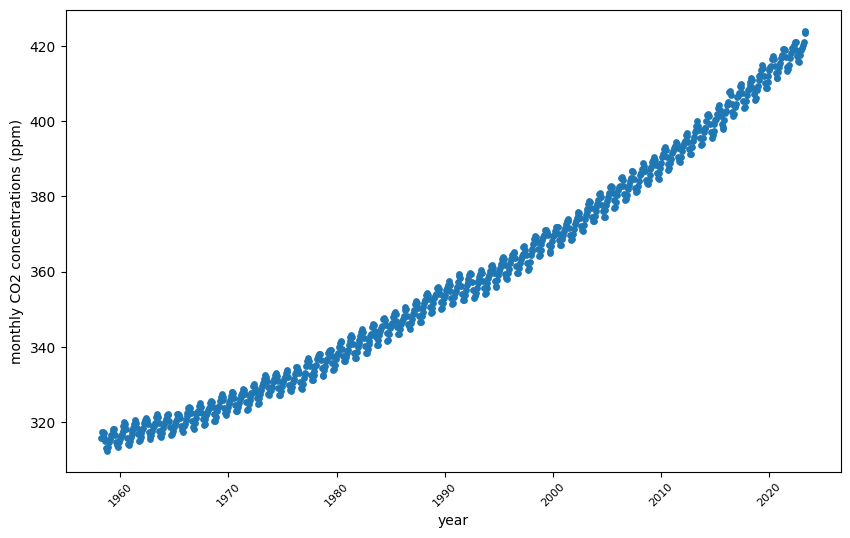

In [121]:
# Display of the monthly CO2 concentrations
co2_monthly_avg = monthly_co2['monthly average'].astype(float)
co2_year = monthly_co2['decimal date'].astype(float)

plt.figure(figsize=(10,6))
plt.scatter(co2_year, co2_monthly_avg, s=15)
plt.xlabel('year')
plt.ylabel('monthly CO2 concentrations (ppm)')
plt.xticks(fontsize=8, rotation=45)
plt.show()

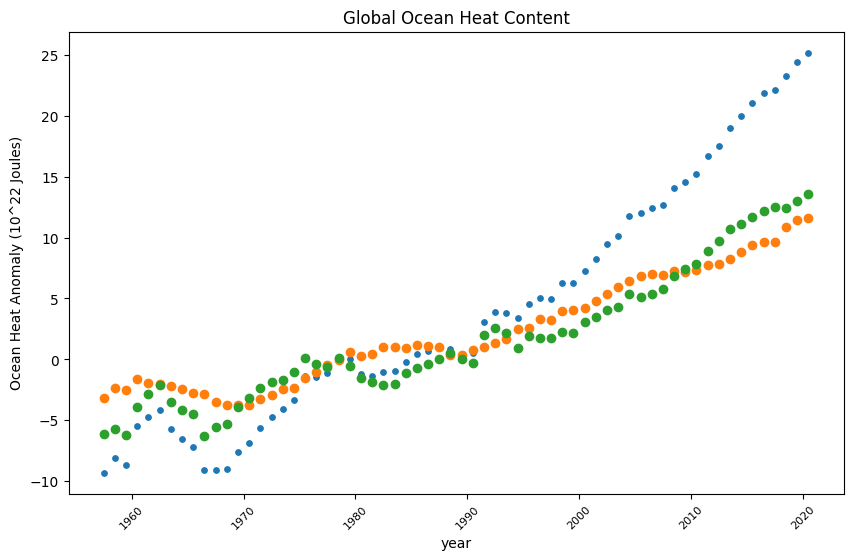

In [126]:
# Display of the global ocean heat content
WO_anomaly = ocean_heat['WO'].astype(float)
NH_anomaly = ocean_heat['NH'].astype(float)
SH_anomaly = ocean_heat['SH'].astype(float)
ocean_heat_year= ocean_heat['year'].astype(float)

plt.figure(figsize=(10,6))
plt.scatter(ocean_heat_year, WO_anomaly, s=15)
plt.scatter(ocean_heat_year, NH_anomaly, s=15)
plt.scatter(ocean_heat_year, SH_anomaly, s=15)
plt.xlabel('year')
plt.title('Global Ocean Heat Content')
plt.ylabel('Ocean Heat Anomaly (10^22 Joules)')
plt.xticks(fontsize=8, rotation=45)
plt.show()

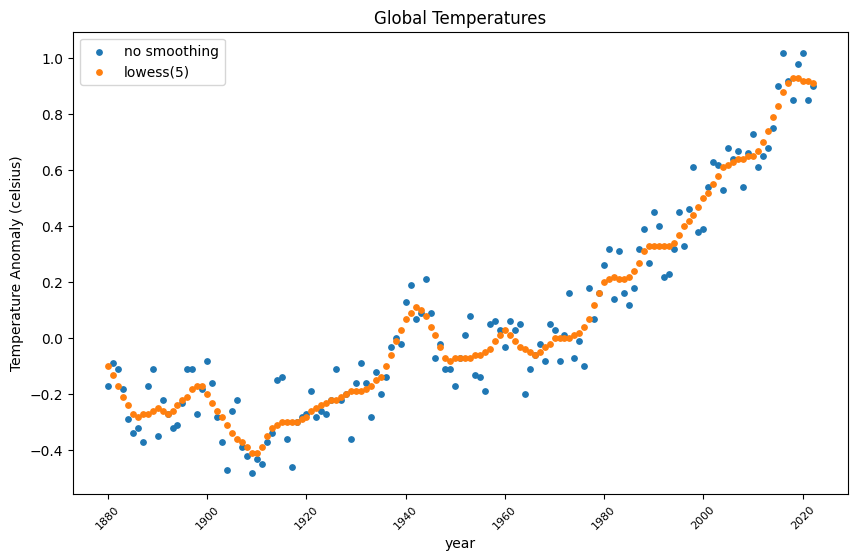

In [132]:
# Display of Global Temperatures

temp_year= global_temps['year'].astype(int)
temp_no_soothing = global_temps['no smoothing'].astype('float')
temp_lowess = global_temps['lowess(5)'].astype('float')

plt.figure(figsize=(10,6))
plt.scatter(temp_year, temp_no_soothing, s=15)
plt.scatter(temp_year, temp_lowess, s=15)
plt.xlabel('year')
plt.legend(['no smoothing', 'lowess(5)'])
plt.title('Global Temperatures')
plt.ylabel('Temperature Anomaly (celsius)')
plt.xticks(fontsize=8, rotation=45)
plt.show()

## Model: Analysis, Hypothesis Testing, and Machine Learning

## Interpretation: Insight and Policy Decision